In [1]:
from sklearn.feature_selection import SelectKBest, chi2, RFE, f_classif
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [11]:
filename = "../data/train.csv"
data = pd.read_csv(filename)

In [12]:
data.describe()

,Package ID,Gluten Content (%),Dough Elasticity Index,Dampening Time (hours),Package Weight (g),Ash content (%),Production Recipe,Moisture (%),Starch Content (%),Package Volume (cm3),Proteins (g)/100g,Color
count,1180.000000,1177.000000,1179.000000,1179.000000,1179.000000,1179.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,545472.830508,10.431674,44.854974,39.832909,800.060009,1.765386,3.016949,14.346483,56.564525,999.976841,10.484686,2.696610
std,258923.527177,1.501808,151.622207,14.991907,5.047033,0.511472,1.443203,0.299316,2.603311,0.998717,1.066499,1.160338
min,100124.000000,-13.040000,4.742000,-49.000000,755.841000,1.280000,1.000000,13.780000,41.980000,996.937689,2.300000,0.000000
25%,326129.500000,9.840000,34.317500,33.000000,797.978500,1.700000,2.000000,14.130000,55.280000,999.293370,9.810000,2.000000
50%,535137.000000,10.350000,40.757000,41.000000,800.675000,1.740000,3.000000,14.260000,56.610000,999.954942,10.420000,2.000000
75%,766583.000000,11.010000,46.570500,50.000000,802.860500,1.790000,4.000000,14.465000,58.052500,1000.647279,11.072500,3.000000
max,999490.000000,14.130000,5219.300000,72.000000,821.083000,19.100000,5.000000,15.970000,78.260000,1003.419904,18.000000,10.000000


Correlation between features

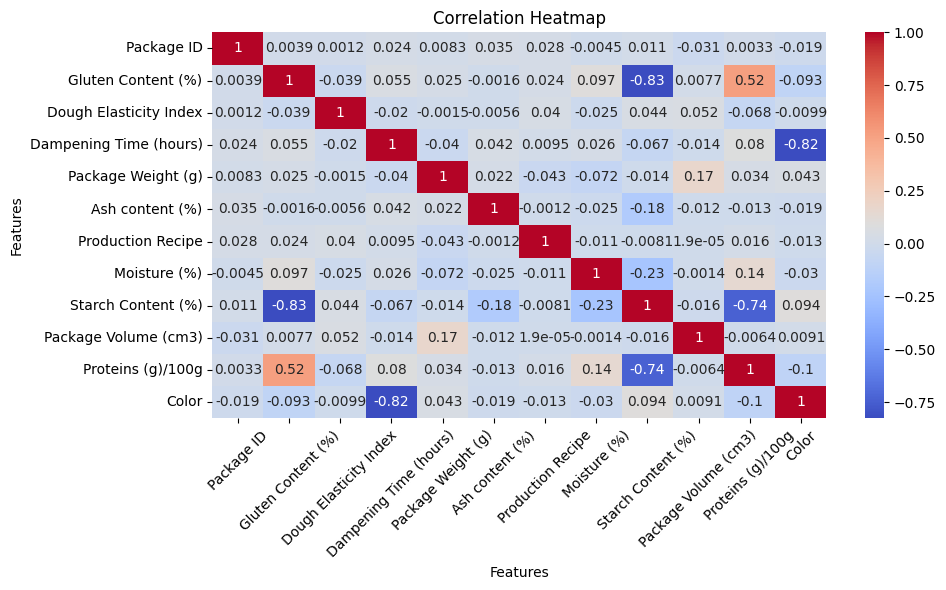

In [13]:
correlation_matrix = data.select_dtypes(include=[np.number]).corr()
# Create a new figure for the heatmap
plt.figure(figsize=(10, 6))

# Generate a heatmap with annotations using seaborn
sns.heatmap(
    correlation_matrix, annot=True, cmap="coolwarm"
)  # Adjust colormap as desired

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Display the heatmap
plt.show()

Visualise correlation between two features

In [25]:
def scatter_plot(feature1, feature2):
    plt.scatter(data[feature1], data[feature2])
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(f"Scatter Plot of {feature1} vs. {feature2}")
    plt.show()

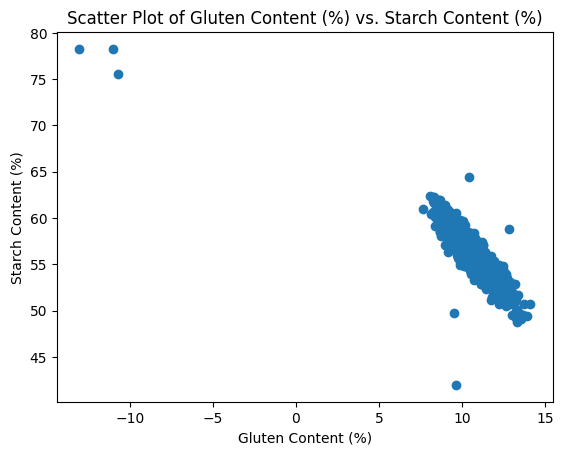

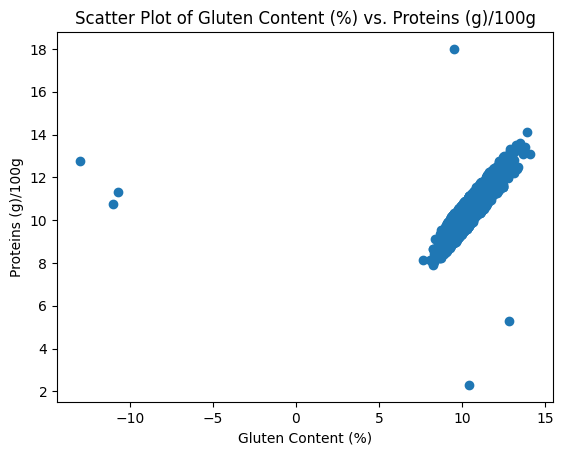

/var/folders/3z/nvbljry53s5_wp97nncv_7sh0000gp/T/ipykernel_91457/80459057.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Dough Elasticity Index"].clip(0, 50, inplace=True)


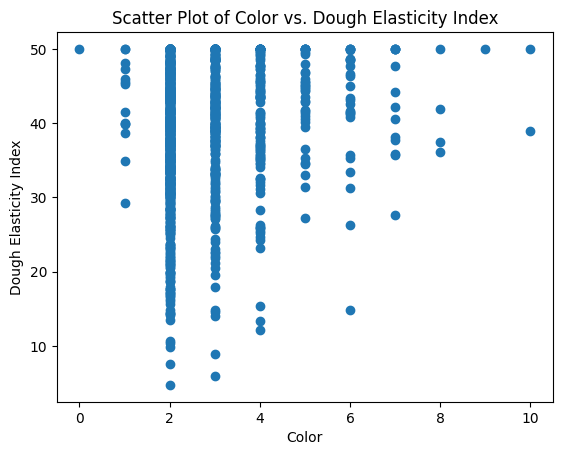

In [28]:
scatter_plot("Gluten Content (%)", "Starch Content (%)")
scatter_plot("Gluten Content (%)", "Proteins (g)/100g")
data["Dough Elasticity Index"].clip(0, 50, inplace=True)
scatter_plot("Color", "Dough Elasticity Index")

## Fitler Methods

In [61]:
filename = "../data/preprocessed/flour_z_3_impute.csv"
data = pd.read_csv(filename)
X = data.drop(["Quality"], axis=1)  # Features
y = data["Quality"]  # Target variable

### Best K

In [62]:
# Select top 10 features based on chi-square scores (suitable for classification)
selector = SelectKBest(score_func=chi2, k=10)
X_filtered = selector.fit_transform(X, y)
X_filtered = pd.DataFrame(X_filtered, columns=X.columns[selector.get_support()])

In [63]:
X_filtered.head()

,Gluten Content (%),Dough Elasticity Index,Dampening Time (hours),Starch Content (%),Proteins (g)/100g,Production Recipe_1.0,Production Recipe_2.0,Production Recipe_3.0,Production Recipe_4.0,Production Recipe_5.0
0,11.59,27.179,44.0,53.66,11.97,0.0,0.0,0.0,1.0,0.0
1,10.64,43.688,35.0,57.16,10.29,0.0,1.0,0.0,0.0,0.0
2,9.26,45.137,28.0,58.48,9.88,1.0,0.0,0.0,0.0,0.0
3,10.35,44.002,37.0,56.13,10.74,0.0,0.0,0.0,1.0,0.0
4,11.22,39.341,18.0,53.27,11.63,0.0,1.0,0.0,0.0,0.0
